# Taitanic Dataset

### 1- Importing Libraries

In [1]:
import pandas as pd # data  processing
import numpy as np #data processing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import warnings #ignore warnings

warnings.filterwarnings('ignore')

### 2- Reading Data

In [2]:
# import data from csv file
train = pd.read_csv('train.csv') #training data
test = pd.read_csv('test.csv') #testing data


### 3- Exploring Data

In [3]:
train.head() #show first 5 rows of training data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns #show column names of training data


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.info() #show data types of training data
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4- Data Preprocceing

In [6]:
# drop the columns that are not needed
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True) 

In [7]:
""""
Define a function that will remove the columns that are not needed
to use in the pipeline
"""
def remove_unwanted_columns(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df



array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

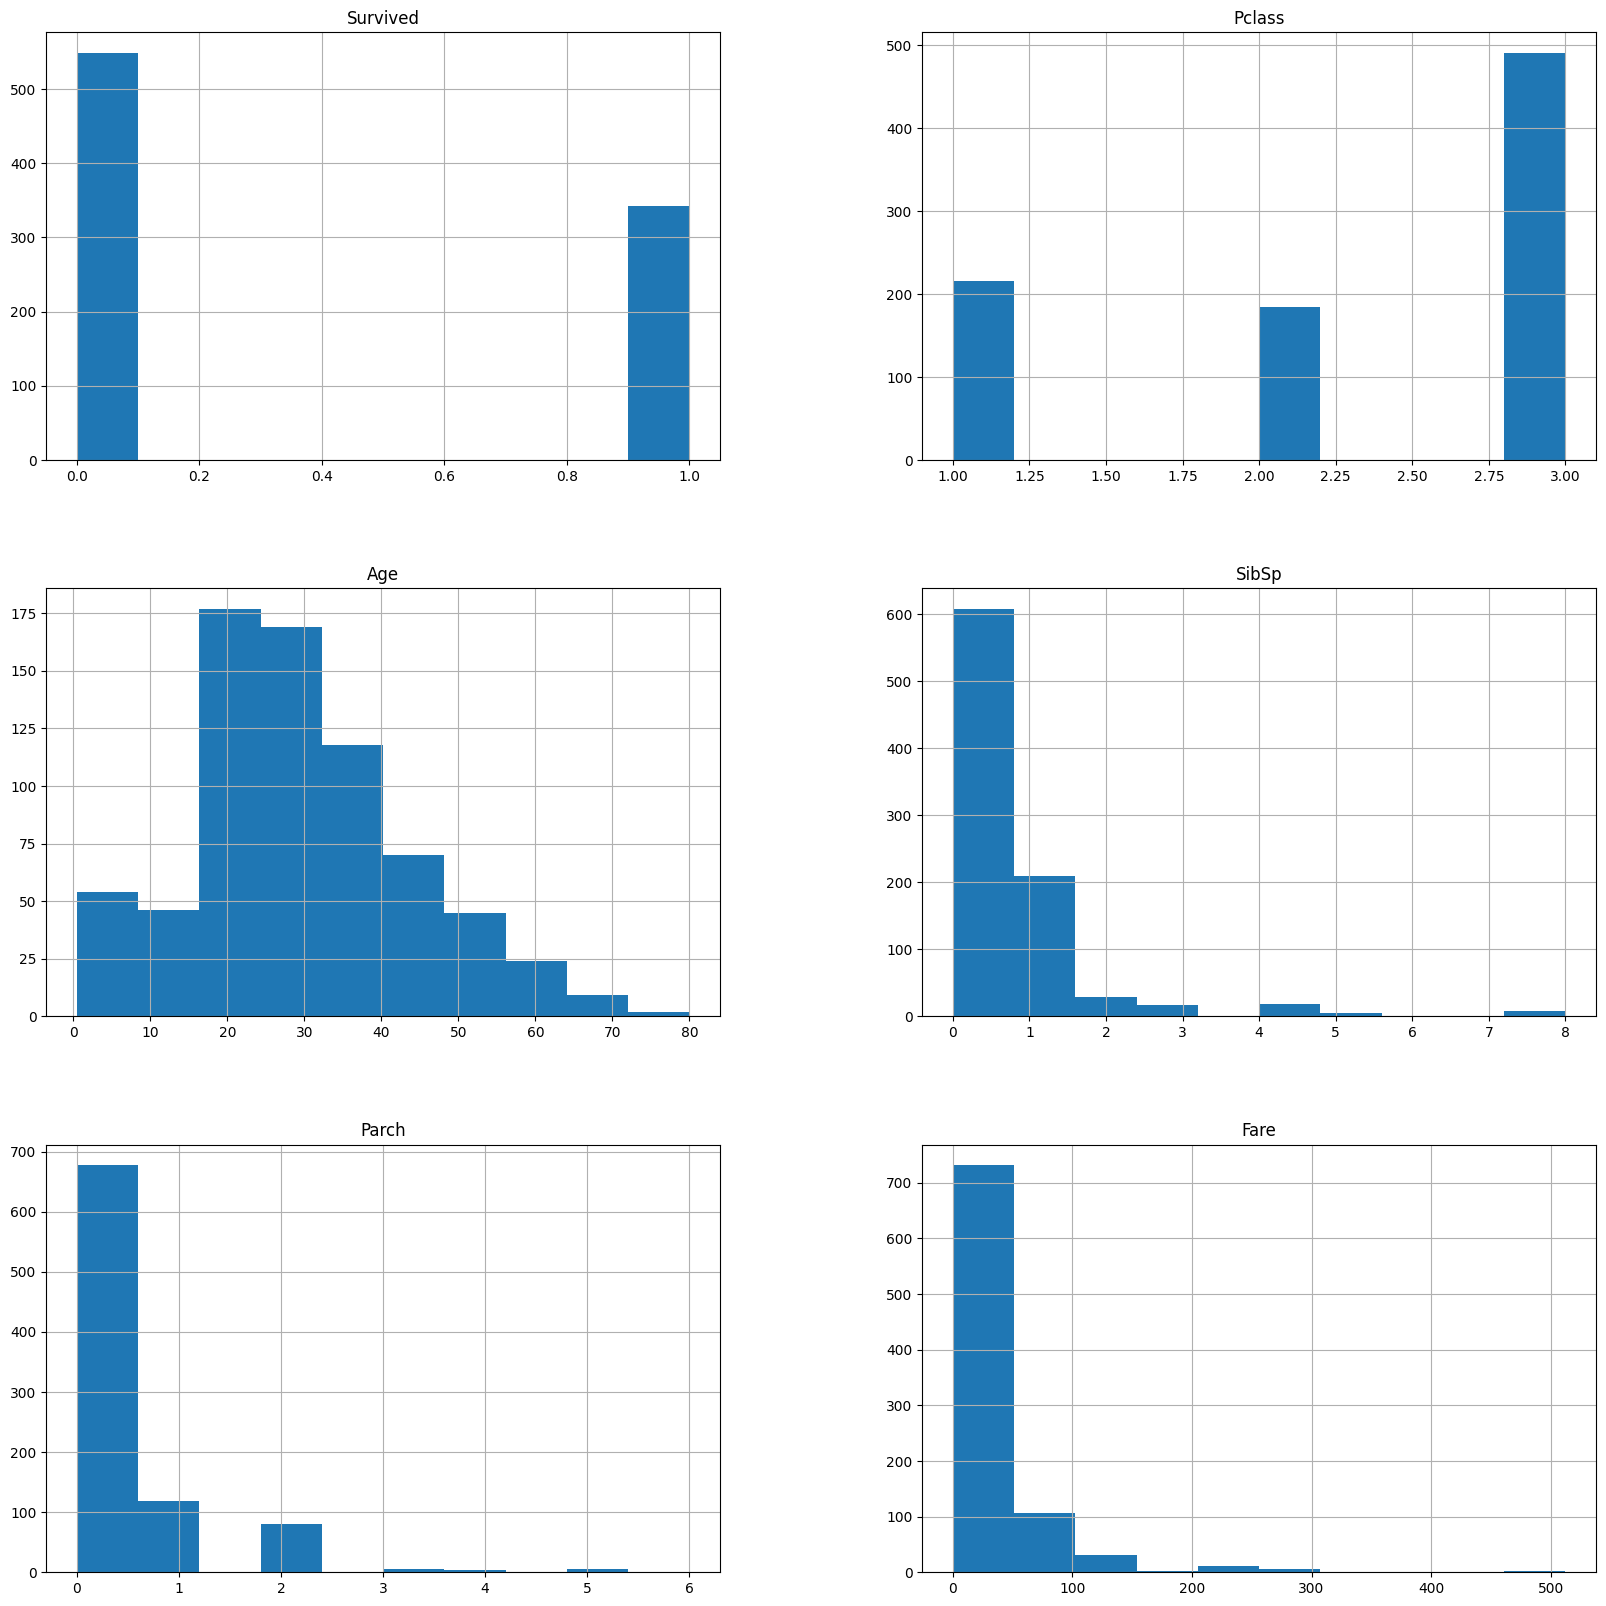

In [8]:
train.hist(figsize=(20, 20)) #show histograms of training data

In [9]:
# count of missing values in each column
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
# get the range of age
print("Minimum age is: ", train['Age'].min())
print("Maximum age is: ", train['Age'].max())

Minimum age is:  0.42
Maximum age is:  80.0


In [11]:
train_target = train['Survived'] #target variable

<Axes: xlabel='Survived', ylabel='count'>

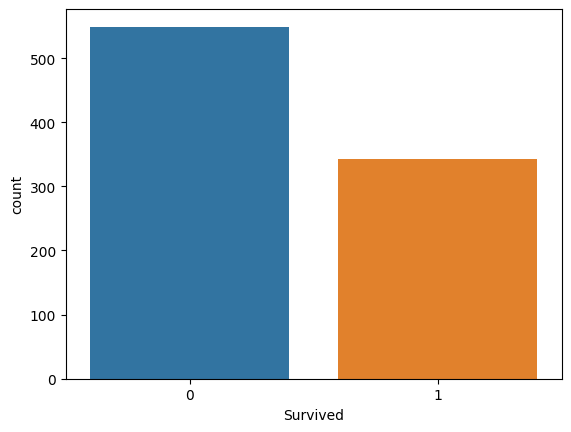

In [12]:

sns.countplot(x='Survived', data=train) #count of survived and not survived

<Axes: title={'center': 'Correlation between features and target'}>

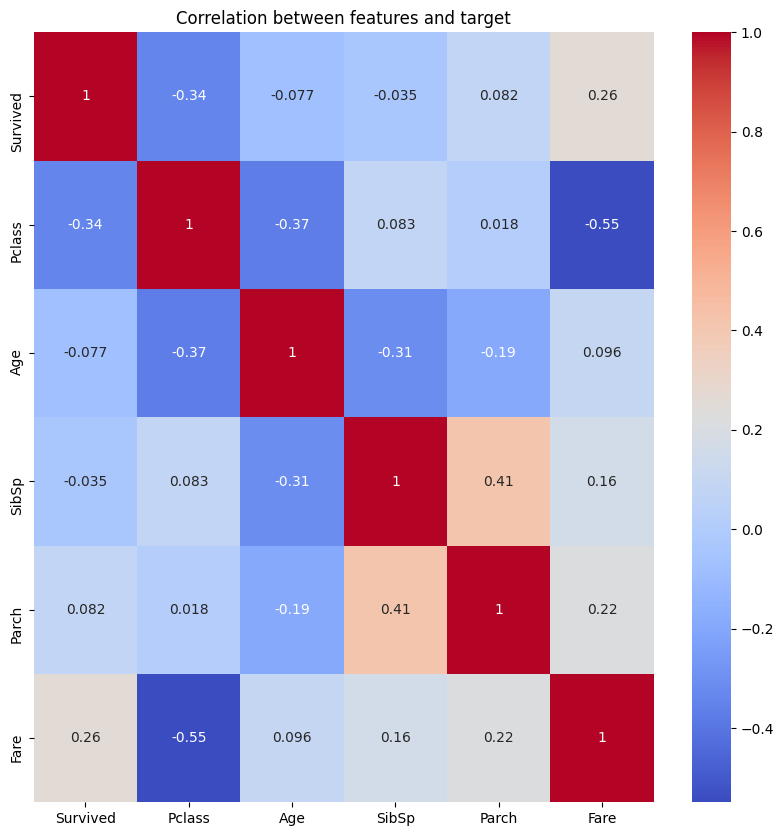

In [13]:
# plottting the correlation betweeen the features and the target
plt.figure(figsize=(10, 10))
plt.title('Correlation between features and target')
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')


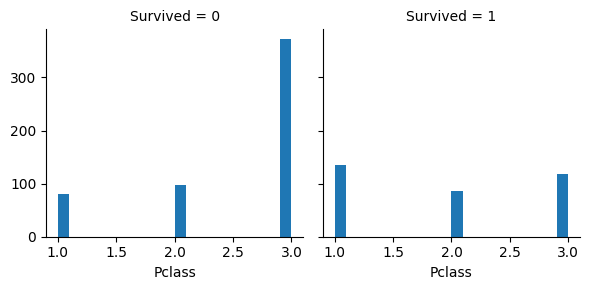

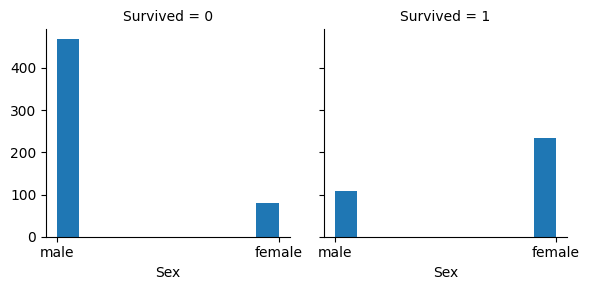

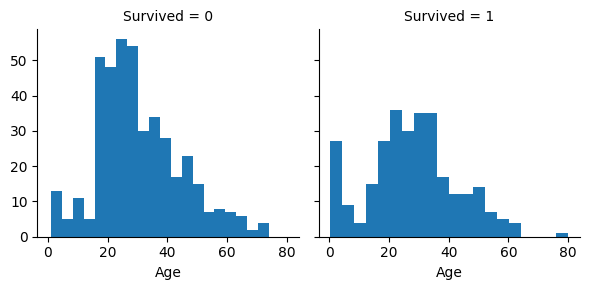

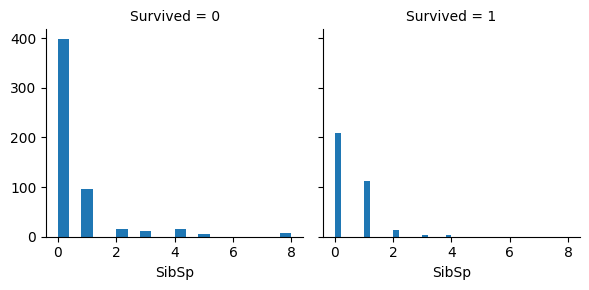

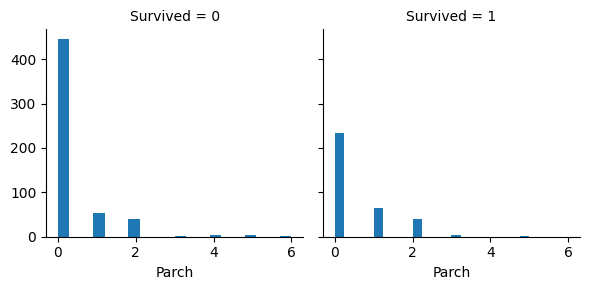

In [14]:
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Pclass', bins=20)
sns.FacetGrid(train, col='Survived').map(plt.hist, 'Sex')
sns.FacetGrid(train, col="Survived").map(plt.hist, "Age", bins=20)
sns.FacetGrid(train, col="Survived").map(plt.hist, "SibSp", bins=20)
sns.FacetGrid(train, col="Survived").map(plt.hist, "Parch", bins=20)

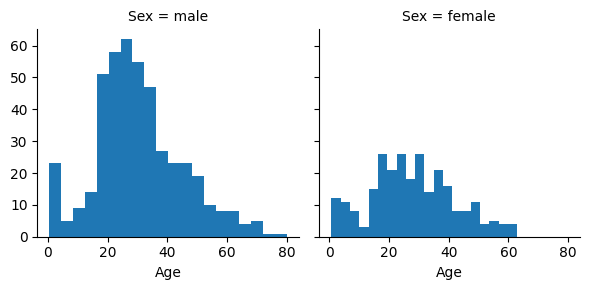

In [15]:
sns.FacetGrid(train, col="Sex").map(plt.hist, "Age", bins=20) 

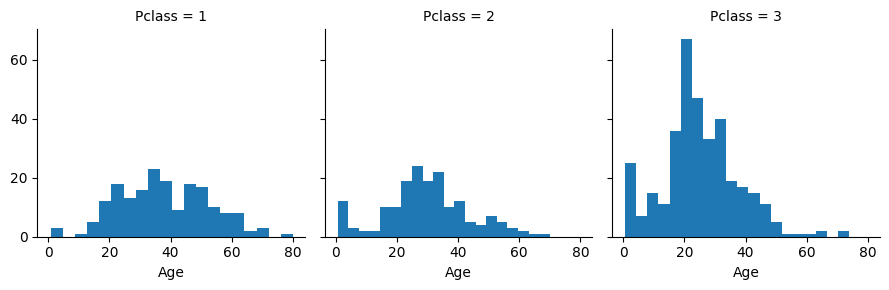

In [16]:
sns.FacetGrid(train, col="Pclass").map(plt.hist, "Age", bins=20) #age distribution in each class

In [17]:
# count age
train['Age'].groupby(train['Sex']).value_counts() 


Sex     Age 
female  24.0    16
        18.0    13
        22.0    12
        30.0    11
        35.0     8
                ..
male    57.0     1
        66.0     1
        70.5     1
        74.0     1
        80.0     1
Name: Age, Length: 145, dtype: int64

In [18]:
train['Age'].groupby(train['Pclass']).mean() #mean age in each class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [19]:
""""
Define a function that will impute the missing values in the age column
with the mean age of the corresponding class
"""
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age
    
    
#impute fare with median
def impute_fare(cols):
    Fare = cols[0]
    if pd.isnull(Fare):
        return train['Fare'].median()
    else:
        return Fare    


In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [21]:
train['Fare'] = train[['Fare']].apply(impute_fare, axis=1)

In [22]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
# remove rosw with missing values in embarked
def remove_missing_values(df):
    train.dropna(inplace=True)
    train.reset_index(inplace=True)
    return df

In [24]:
train.count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [25]:
""""
Define a function that will perform one hot encoding on the embarked column
"""
from sklearn.preprocessing import OneHotEncoder

drop_col = train['Embarked']
oneHot = OneHotEncoder()
a = oneHot.fit_transform(drop_col.values.reshape(-1, 1))
a = a.toarray()
print(oneHot.categories_)
a = pd.DataFrame(a, columns=[
                 "Embarked_"+str(oneHot.categories_[0][i]) for i in range(a.shape[1])])
train = pd.concat([train, a], axis=1,)
train.drop(['Embarked'], axis=1, inplace=True)


[array(['C', 'Q', 'S', nan], dtype=object)]


In [26]:
train.count() 

Survived        891
Pclass          891
Sex             891
Age             891
SibSp           891
Parch           891
Fare            891
Embarked_C      891
Embarked_Q      891
Embarked_S      891
Embarked_nan    891
dtype: int64

In [27]:
train.drop(['Embarked_nan'], axis=1, inplace=True)

In [28]:
train.count()

Survived      891
Pclass        891
Sex           891
Age           891
SibSp         891
Parch         891
Fare          891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [29]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [30]:
train.count()


Survived      891
Pclass        891
Sex           891
Age           891
SibSp         891
Parch         891
Fare          891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [32]:
#encoding sex column
def one_hot_encoding(df,column_name):
    drop_col = df[column_name]
    oneHot = OneHotEncoder()
    a = oneHot.fit_transform(drop_col.values.reshape(-1, 1))
    a = a.toarray()
    print(oneHot.categories_)
    a = pd.DataFrame(a, columns=[
                     column_name+"_" +str(oneHot.categories_[0][i]) for i in range(a.shape[1])])
    df = pd.concat([df, a], axis=1,)
    df.drop([column_name], axis=1, inplace=True)
    return df

# kfolds cross validation
from sklearn.model_selection import KFold



 #stratify for preserving the ratio of the target variable
 #combine all object columns in new one column  
def combie(df) :
     for col in df.select_dtypes(include=['object']).columns:
         df[col] = df[col].astype('category')
    

In [33]:
train= one_hot_encoding(train,"Sex")

[array(['female', 'male'], dtype=object)]


In [35]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
 9   Sex_female  891 non-null    float64
 10  Sex_male    891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.7 KB


In [36]:
train.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')

In [37]:
train_target = train['Survived']


In [38]:
train.drop(['Survived'], axis=1, inplace=True)


In [39]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked_C  891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
 8   Sex_female  891 non-null    float64
 9   Sex_male    891 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 69.7 KB


### PipeLine

In [40]:
#create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class PipeLine:
    
    def __init__(self, df):
        self.df = df
        
        
    
    
    def remove_unwanted_columns(self):
        self.df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
        return self.df
    
    def impute_age(self ,cols):
        Age = cols[0]
        Pclass = cols[1]
        if pd.isnull(Age):
            if Pclass == 1:
                return 38
            elif Pclass == 2:
                return 29
            else:
                return 25
        else:
            pass 
        self.df['Age'] = self.df[['Age', 'Pclass']].apply(impute_age, axis=1)
        return self.df
       
    
    
    def impute_fare(self,cols):
        Fare = cols[0]
        if pd.isnull(Fare):
            return train['Fare'].median()
        else:
            pass
        self.df['Fare'] = self.df[['Fare']].apply(self.impute_age, axis=1)
        return self.df

    def remove_missing_values(self):
        self.df.dropna(inplace=True)
        self.df.reset_index(inplace=True)
        return self.df
        
    
    def one_hot_encoding(self,column_name):
        drop_col = self.df[column_name]
        oneHot = OneHotEncoder()
        a = oneHot.fit_transform(drop_col.values.reshape(-1, 1))
        a = a.toarray()
        print(oneHot.categories_)
        a = pd.DataFrame(a, columns=[
                         column_name+"_" +str(oneHot.categories_[0][i]) for i in range(a.shape[1])])
        self.df = pd.concat([self.df, a], axis=1,)
        self.df.drop([column_name], axis=1, inplace=True)
        return self.df
    
    def scale(self,cols):
        scaler = StandardScaler()
        self.df[cols] = scaler.fit_transform(self.df[cols])
        return self.df

    
    
    
    def get_df(self):
        return self.df
    
    def get_target(self):
        return self.df['Survived']
    
    def get_features(self):
        self.df.drop(['Survived'], axis=1, inplace=True)
        return self.df
    
    #apply pipeline
    def apply(df):
        df = PipeLine(df).remove_unwanted_columns().impute_age(["Age", "Pclass"]).impute_fare(["Fare"]).remove_missing_values().one_hot_encoding("Sex").one_hot_encoding("Embarked").scale().get_df()
        return df
            

    


### 5- Hyper Model Tuning

In [41]:
# Random search for best parameters
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],}
random_search = RandomizedSearchCV(estimator=RandomForestClassifier() , param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(train, train_target)
random_search.best_params_.get('n_estimators')


Fitting 5 folds for each of 10 candidates, totalling 50 fits


1400

In [ ]:
best_random = random_search.best_estimator_
print("Best random Value: ", best_random)
best_params = random_search.best_params_
print("Best parameters: ", best_params)


Best random Value:  RandomForestClassifier(n_estimators=400)
Best parameters:  {'n_estimators': 400}


In [42]:
#Scalig Age and Fare
from sklearn.preprocessing import StandardScaler

def scale(df):
    scaler = StandardScaler()
    df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
    return df
train_data = scale(train)

### 6- Splitting The Data

In [43]:
#Splitting the data into training and validation sets
from sklearn.model_selection import train_test_split

splitter = train_test_split(train, train_target, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = splitter



### 7 - Modling

In [44]:
# import liner model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
testing_lr = linear.fit(X_train, y_train)
print("Linear Regression score: ", linear.score(X_train, y_train))
print("Linear Regression score: ", linear.score(X_val, y_val))



Linear Regression score:  0.3867690943845271
Linear Regression score:  0.43438400480848793


In [45]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
model = logistic_model.fit(train, train_target)
print("Logistic Regression score: ", model.score(train, train_target))
print("Logistic Regression score: ", model.score(X_val, y_val))


Logistic Regression score:  0.8047138047138047
Logistic Regression score:  0.8116591928251121


In [46]:
#SVM
from sklearn.svm import SVC

svm = SVC()
model = svm.fit(train, train_target)
print("SVM score: ", model.score(train, train_target))
print("SVM score: ", model.score(X_val, y_val))

SVM score:  0.8338945005611672
SVM score:  0.8251121076233184


In [47]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
model = dec_tree.fit(train, train_target)
print("Decision Tree score: ", model.score(train, train_target))
print("Decision Tree score: ", model.score(X_val, y_val))


Decision Tree score:  0.9820426487093153
Decision Tree score:  0.9955156950672646


In [48]:
#random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=random_search.best_params_.get('n_estimators'),)
random_forest.fit(train, train_target)
print("Random Forest score: ", random_forest.score(train, train_target))
print("Random Forest score: ", random_forest.score(X_val, y_val)) #overfitting

Random Forest score:  0.9820426487093153
Random Forest score:  0.9955156950672646


### 8- Test Models

In [49]:
test_data = pd.read_csv('test.csv')


In [50]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
remove_unwanted_columns(test_data)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [53]:
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [54]:
test_data['Fare'] = test_data[['Fare']].apply(impute_fare, axis=1)

In [55]:
test_data= one_hot_encoding(test_data,"Sex")
test_data= one_hot_encoding(test_data,"Embarked")

[array(['female', 'male'], dtype=object)]
[array(['C', 'Q', 'S'], dtype=object)]


In [56]:
test_data = scale(test_data)

In [57]:
test_data.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [58]:
sub =   svm.predict(test_data)
sub = pd.DataFrame(sub)
sub.columns = ['Survived']
sub['PassengerId'] = test['PassengerId']
sub = sub[['PassengerId', 'Survived']]
sub.to_csv('submission.csv', index=False)

In [59]:
test_actual=pd.read_csv("gender_submission.csv")

In [60]:
# testing  the model
# losgitic regression
df_test = logistic_model.predict(test_data)
print("Logistic Regression score: ", logistic_model.score(test_data, test_actual['Survived']))


Logistic Regression score:  0.645933014354067


In [62]:
df_test = df_test.reshape(-1,1)

In [63]:
#score 
test_actual_v = test_actual['Survived'].values.reshape(-1,1)
score = logistic_model.score(test_data, test_actual_v)
print("Logistic Regression score: ", score)

Logistic Regression score:  0.645933014354067


In [64]:
#svm score
df_test = svm.predict(test_data)
score = svm.score(test_data, test_actual_v)
print("SVM score: ", score)

SVM score:  0.638755980861244


In [65]:
#score random forest
test_actual_v = test_actual['Survived'].values.reshape(-1,1)
score = random_forest.score(test_data, test_actual_v)
print("Logistic Regression score: ", score)

Logistic Regression score:  0.715311004784689


In [66]:
sub =   random_forest.predict(test_data)
sub = pd.DataFrame(sub)
sub.columns = ['Survived']
sub['PassengerId'] = test['PassengerId']
sub = sub[['PassengerId', 'Survived']]
sub.to_csv('submission-random-forest.csv', index=False)

In [67]:
#import ensampling models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#random forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
#gradient boosting
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)


#ada boosting
ada_boosting = AdaBoostRegressor()
ada_boosting.fit(X_train, y_train)


#ensemble model
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor([('rf', random_forest), ('gb', gradient_boosting), ('ab', ada_boosting)])
voting_regressor.fit(X_train, y_train)
voting_regressor.score(X_val, y_val)


0.43516200742161126

In [ ]:
#Summary
"""The best model is the random forest model with a score of 0.83."""
"""The worst model is the linear regression model with a score of 0.37."""
"""The best model is the random forest model with a score of 0.83."""




""""

i use this code to get ranodm grid search to get ebst parameters for random forest

# Random search for best parameters
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],}
random_search = RandomizedSearchCV(estimator=RandomForestClassifier() , param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(train, train_target)
random_search.best_params_.get('n_estimators')





"""
""""
When I used the test data to test the model, the score was 0.77.


 In Ensemble I used random forest, gradient boosting and ada boosting. 
 
 at the end I used voting regressor to get the best score.
 
 """